# Intro

## Librerías

In [1]:
# Data
import os
import numpy as np
import pandas as pd

# SkLearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Display
from IPython.display import clear_output

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Input, Dropout, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

# Gradient Boosting
import xgboost as xgb

# Import/Export
import pickle
import joblib

# Optimización Inversa
from scipy.optimize import differential_evolution, minimize

In [3]:
REPO_NAME = "Multi-Parameter_Wireless_Network"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/MiguelMussi/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'Multi-Parameter_Wireless_Network'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 376 (delta 127), reused 192 (delta 109), pack-reused 159
Receiving objects: 100% (376/376), 35.72 MiB | 18.72 MiB/s, done.
Resolving deltas: 100% (167/167), done.


Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

## DataFrame

In [4]:
# Leer el archivo de texto
with open('datos.txt', 'r') as file:
    data = file.read()

# Dividir los datos por líneas y luego por espacios
lines = data.strip().split('\n')
rows = [line.split() for line in lines]

# Convertir la lista de listas en un DataFrame
df = pd.DataFrame(rows)

# # Asignar nombres a las columnas
# df.columns = ['ID', 'Value1', 'Value2', 'Value3', 'Value4', ...]

# Convertir los datos a tipos numéricos
df = df.apply(pd.to_numeric)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33346,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,13.96,6.05,18.45
33347,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,21.56,5.56,22.13
33348,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,17.41,6.01,20.87
33349,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,15.63,6.21,19.22


## Análisis Exploratorio

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33351 entries, 0 to 33350
Columns: 227 entries, 0 to 226
dtypes: float64(3), int64(224)
memory usage: 57.8 MB


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
count,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,...,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000
mean,89.108696,5.452319,56.211594,14.459565,270.623188,4.798261,66.001812,12.888333,142.038406,3.803913,...,13.048261,60.049275,12.900217,60.267391,7.243478,65.336957,13.621087,13.402653,6.780602,18.668475
std,23.065076,6.722242,36.817212,8.904358,17.860895,5.630443,34.382395,7.968245,162.802776,7.413796,...,5.622106,37.112924,8.493261,23.253259,6.099864,39.437474,7.235510,9.667633,3.155672,6.256124
min,70.000000,-7.000000,15.000000,6.000000,250.000000,-5.000000,15.000000,6.000000,0.000000,-7.000000,...,4.000000,15.000000,6.000000,30.000000,-3.000000,15.000000,6.000000,0.130000,2.050000,6.250000
25%,70.000000,1.000000,25.000000,6.000000,260.000000,3.000000,45.000000,6.000000,0.000000,-5.000000,...,6.000000,25.000000,6.000000,30.000000,3.000000,25.000000,6.000000,6.160000,4.450000,13.830000
50%,80.000000,7.000000,45.000000,12.000000,260.000000,5.000000,65.000000,12.000000,30.000000,3.000000,...,14.000000,45.000000,6.000000,70.000000,7.000000,65.000000,12.000000,11.960000,6.280000,18.580000
75%,100.000000,11.000000,105.000000,25.000000,280.000000,11.000000,105.000000,25.000000,350.000000,13.000000,...,20.000000,105.000000,25.000000,80.000000,13.000000,110.000000,25.000000,16.950000,8.140000,22.322500
max,130.000000,13.000000,110.000000,25.000000,300.000000,13.000000,110.000000,25.000000,350.000000,13.000000,...,22.000000,110.000000,25.000000,90.000000,15.000000,110.000000,25.000000,44.080000,21.400000,40.370000


## Renombrar columnas

In [7]:
df.columns

RangeIndex(start=0, stop=227, step=1)

In [ ]:
# def renombrar_columnas(df):
#     new_col_names = [f'{i+1}' for i in range(df.shape[1]-3)]
#     new_col_names.extend(['R1', 'R2', 'R3'])
#     df.columns = new_col_names
#     return df

In [8]:
def renombrar_columnas(df):
    new_col_names = []
    for i in range(1, 57):
        new_col_names.extend([f'{i}a', f'{i}b', f'{i}c', f'{i}d'])

    new_col_names.extend(['R1', 'R2', 'R3'])
    df.columns = new_col_names
    return df

In [9]:
df = renombrar_columnas(df)

In [10]:
df

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,55b,55c,55d,56a,56b,56c,56d,R1,R2,R3
0,100,5,15,25,250,7,45,25,20,11,...,20,110,25,80,3,90,12,12.42,8.52,21.36
1,100,3,105,6,260,7,90,6,20,11,...,6,25,12,30,7,45,12,18.92,6.64,21.18
2,110,-3,45,12,250,7,45,25,20,3,...,14,65,12,30,13,110,6,12.63,6.59,17.89
3,100,3,105,6,270,3,105,6,330,13,...,10,25,25,70,15,110,25,11.07,9.36,22.05
4,100,3,105,6,280,11,15,12,330,13,...,10,25,6,80,3,90,12,15.78,7.42,20.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33346,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,13.96,6.05,18.45
33347,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,21.56,5.56,22.13
33348,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,17.41,6.01,20.87
33349,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,15.63,6.21,19.22


In [11]:
df.columns

Index(['1a', '1b', '1c', '1d', '2a', '2b', '2c', '2d', '3a', '3b',
       ...
       '55b', '55c', '55d', '56a', '56b', '56c', '56d', 'R1', 'R2', 'R3'],
      dtype='object', length=227)

## Filas Duplicadas

In [12]:
filas_duplicadas = df.duplicated().any()
num_duplicados = df.duplicated().sum()
print(f"Hay {num_duplicados} filas duplicadas.") if filas_duplicadas.any() else print("No hay filas duplicadas.")

Hay 2525 filas duplicadas.


In [13]:
filas_duplicadas = df[df.duplicated()]
filas_duplicadas

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,55b,55c,55d,56a,56b,56c,56d,R1,R2,R3
900,130,11,105,6,280,-5,45,25,340,-1,...,20,105,6,90,13,25,12,7.68,5.67,13.22
901,70,13,105,6,260,-5,45,6,30,-7,...,20,105,6,60,13,25,25,6.10,3.65,10.52
902,90,13,25,6,260,-5,45,6,10,13,...,6,45,6,40,5,110,25,5.38,4.18,11.01
903,70,13,105,6,250,5,45,12,30,-7,...,20,105,6,60,13,25,25,4.95,3.57,10.30
904,130,11,105,6,250,7,45,25,0,13,...,16,25,6,30,13,110,6,2.47,14.50,25.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32496,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,17.70,5.48,19.99
32497,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,12.72,6.46,18.47
32498,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,15.69,6.23,20.56
32499,100,3,105,6,270,3,105,6,0,3,...,12,105,6,60,5,105,6,19.94,5.60,21.67


In [14]:
def eliminar_registros_duplicados(df):
    df_clean = df.drop_duplicates()
    return df_clean

In [15]:
df = eliminar_registros_duplicados(df)

In [18]:
df.shape

(30826, 227)

### Calcular U1/U2

In [19]:
def calcular_u(df):
    df['U1'] = 100 - df[['R1', 'R2', 'R3']].max(axis=1)
    df['U2'] = 100 - (df['R1'] + df['R2'] + df['R3']) / 3
    return df

In [21]:
df = calcular_u(df)

In [22]:
df

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,55d,56a,56b,56c,56d,R1,R2,R3,U1,U2
0,100,5,15,25,250,7,45,25,20,11,...,25,80,3,90,12,12.42,8.52,21.36,78.64,85.900000
1,100,3,105,6,260,7,90,6,20,11,...,12,30,7,45,12,18.92,6.64,21.18,78.82,84.420000
2,110,-3,45,12,250,7,45,25,20,3,...,12,30,13,110,6,12.63,6.59,17.89,82.11,87.630000
3,100,3,105,6,270,3,105,6,330,13,...,25,70,15,110,25,11.07,9.36,22.05,77.95,85.840000
4,100,3,105,6,280,11,15,12,330,13,...,6,80,3,90,12,15.78,7.42,20.80,79.20,85.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33346,100,3,105,6,270,3,105,6,0,3,...,6,60,5,105,6,13.96,6.05,18.45,81.55,87.180000
33347,100,3,105,6,270,3,105,6,0,3,...,6,60,5,105,6,21.56,5.56,22.13,77.87,83.583333
33348,100,3,105,6,270,3,105,6,0,3,...,6,60,5,105,6,17.41,6.01,20.87,79.13,85.236667
33349,100,3,105,6,270,3,105,6,0,3,...,6,60,5,105,6,15.63,6.21,19.22,80.78,86.313333


## Train / Test

In [23]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [24]:
df_train.shape, df_test.shape

((24660, 229), (6166, 229))

## Normalización

In [25]:
def escalar_datos(df, scaler_dict=None):
    # Si no se proporciona un diccionario de scalers, inicializar uno
    if scaler_dict is None:
        scaler_dict = {}

    # Iterar sobre cada columna en el DataFrame
    for columna in df.columns:
        # Inicializar un scaler para cada columna si no está en el diccionario
        if columna not in scaler_dict:
            scaler_dict[columna] = MinMaxScaler()
        # Escalar la columna y reemplazar los valores en el DataFrame
        df[columna] = scaler_dict[columna].fit_transform(df[[columna]])

    # Devolver el DataFrame escalado y el diccionario de scalers
    return df, scaler_dict

In [26]:
df_train, train_scaler_dict = escalar_datos(df_train)

In [27]:
df_train.describe()

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,55d,56a,56b,56c,56d,R1,R2,R3,U1,U2
count,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,...,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000,24660.000000
mean,0.281901,0.630361,0.485034,0.456051,0.288102,0.532644,0.497501,0.472939,0.520299,0.558998,...,0.346656,0.506076,0.685302,0.663811,0.500824,0.240261,0.184455,0.277870,0.726603,0.713452
std,0.355682,0.310240,0.375920,0.477535,0.325151,0.275519,0.323926,0.452036,0.479819,0.323587,...,0.449020,0.342221,0.324088,0.412819,0.430781,0.195165,0.153678,0.216001,0.225308,0.231431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.105263,0.000000,0.000000,0.444444,0.315789,0.000000,0.028571,0.300000,...,0.000000,0.000000,0.444444,0.105263,0.000000,0.087595,0.043419,0.050214,0.574994,0.538142
50%,0.000000,0.600000,0.526316,0.315789,0.200000,0.555556,0.315789,0.315789,0.942857,0.700000,...,0.000000,0.666667,0.888889,0.947368,0.315789,0.171750,0.166819,0.271100,0.743449,0.738583
75%,0.500000,0.900000,0.947368,1.000000,0.400000,0.666667,0.947368,1.000000,1.000000,0.700000,...,1.000000,0.666667,1.000000,1.000000,1.000000,0.350149,0.269196,0.450588,0.951834,0.948106
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X/y Train

In [28]:
def separar_Xy(df, columnas_target):
# def separar_Xy(df, cant_var_target):
    # POR NOMBRE
    X = df.drop(columnas_target, axis=1).copy()
    y = df[columnas_target].copy()

    # POR CANTIDAD
    # y = df.iloc[:, -cant_var_target:].copy()
    # X = df.iloc[:, :-cant_var_target].copy()

    return X, y

In [29]:
# columnas_target = ['R1', 'R2', 'R3']
columnas_target = ['U1', 'U2']
# cant_var_target = 3

In [30]:
X_train, y_train = separar_Xy(df_train, columnas_target=columnas_target)
# X_train, y_train = separar_Xy(df_train, cant_var_target)

## Visualizaciones

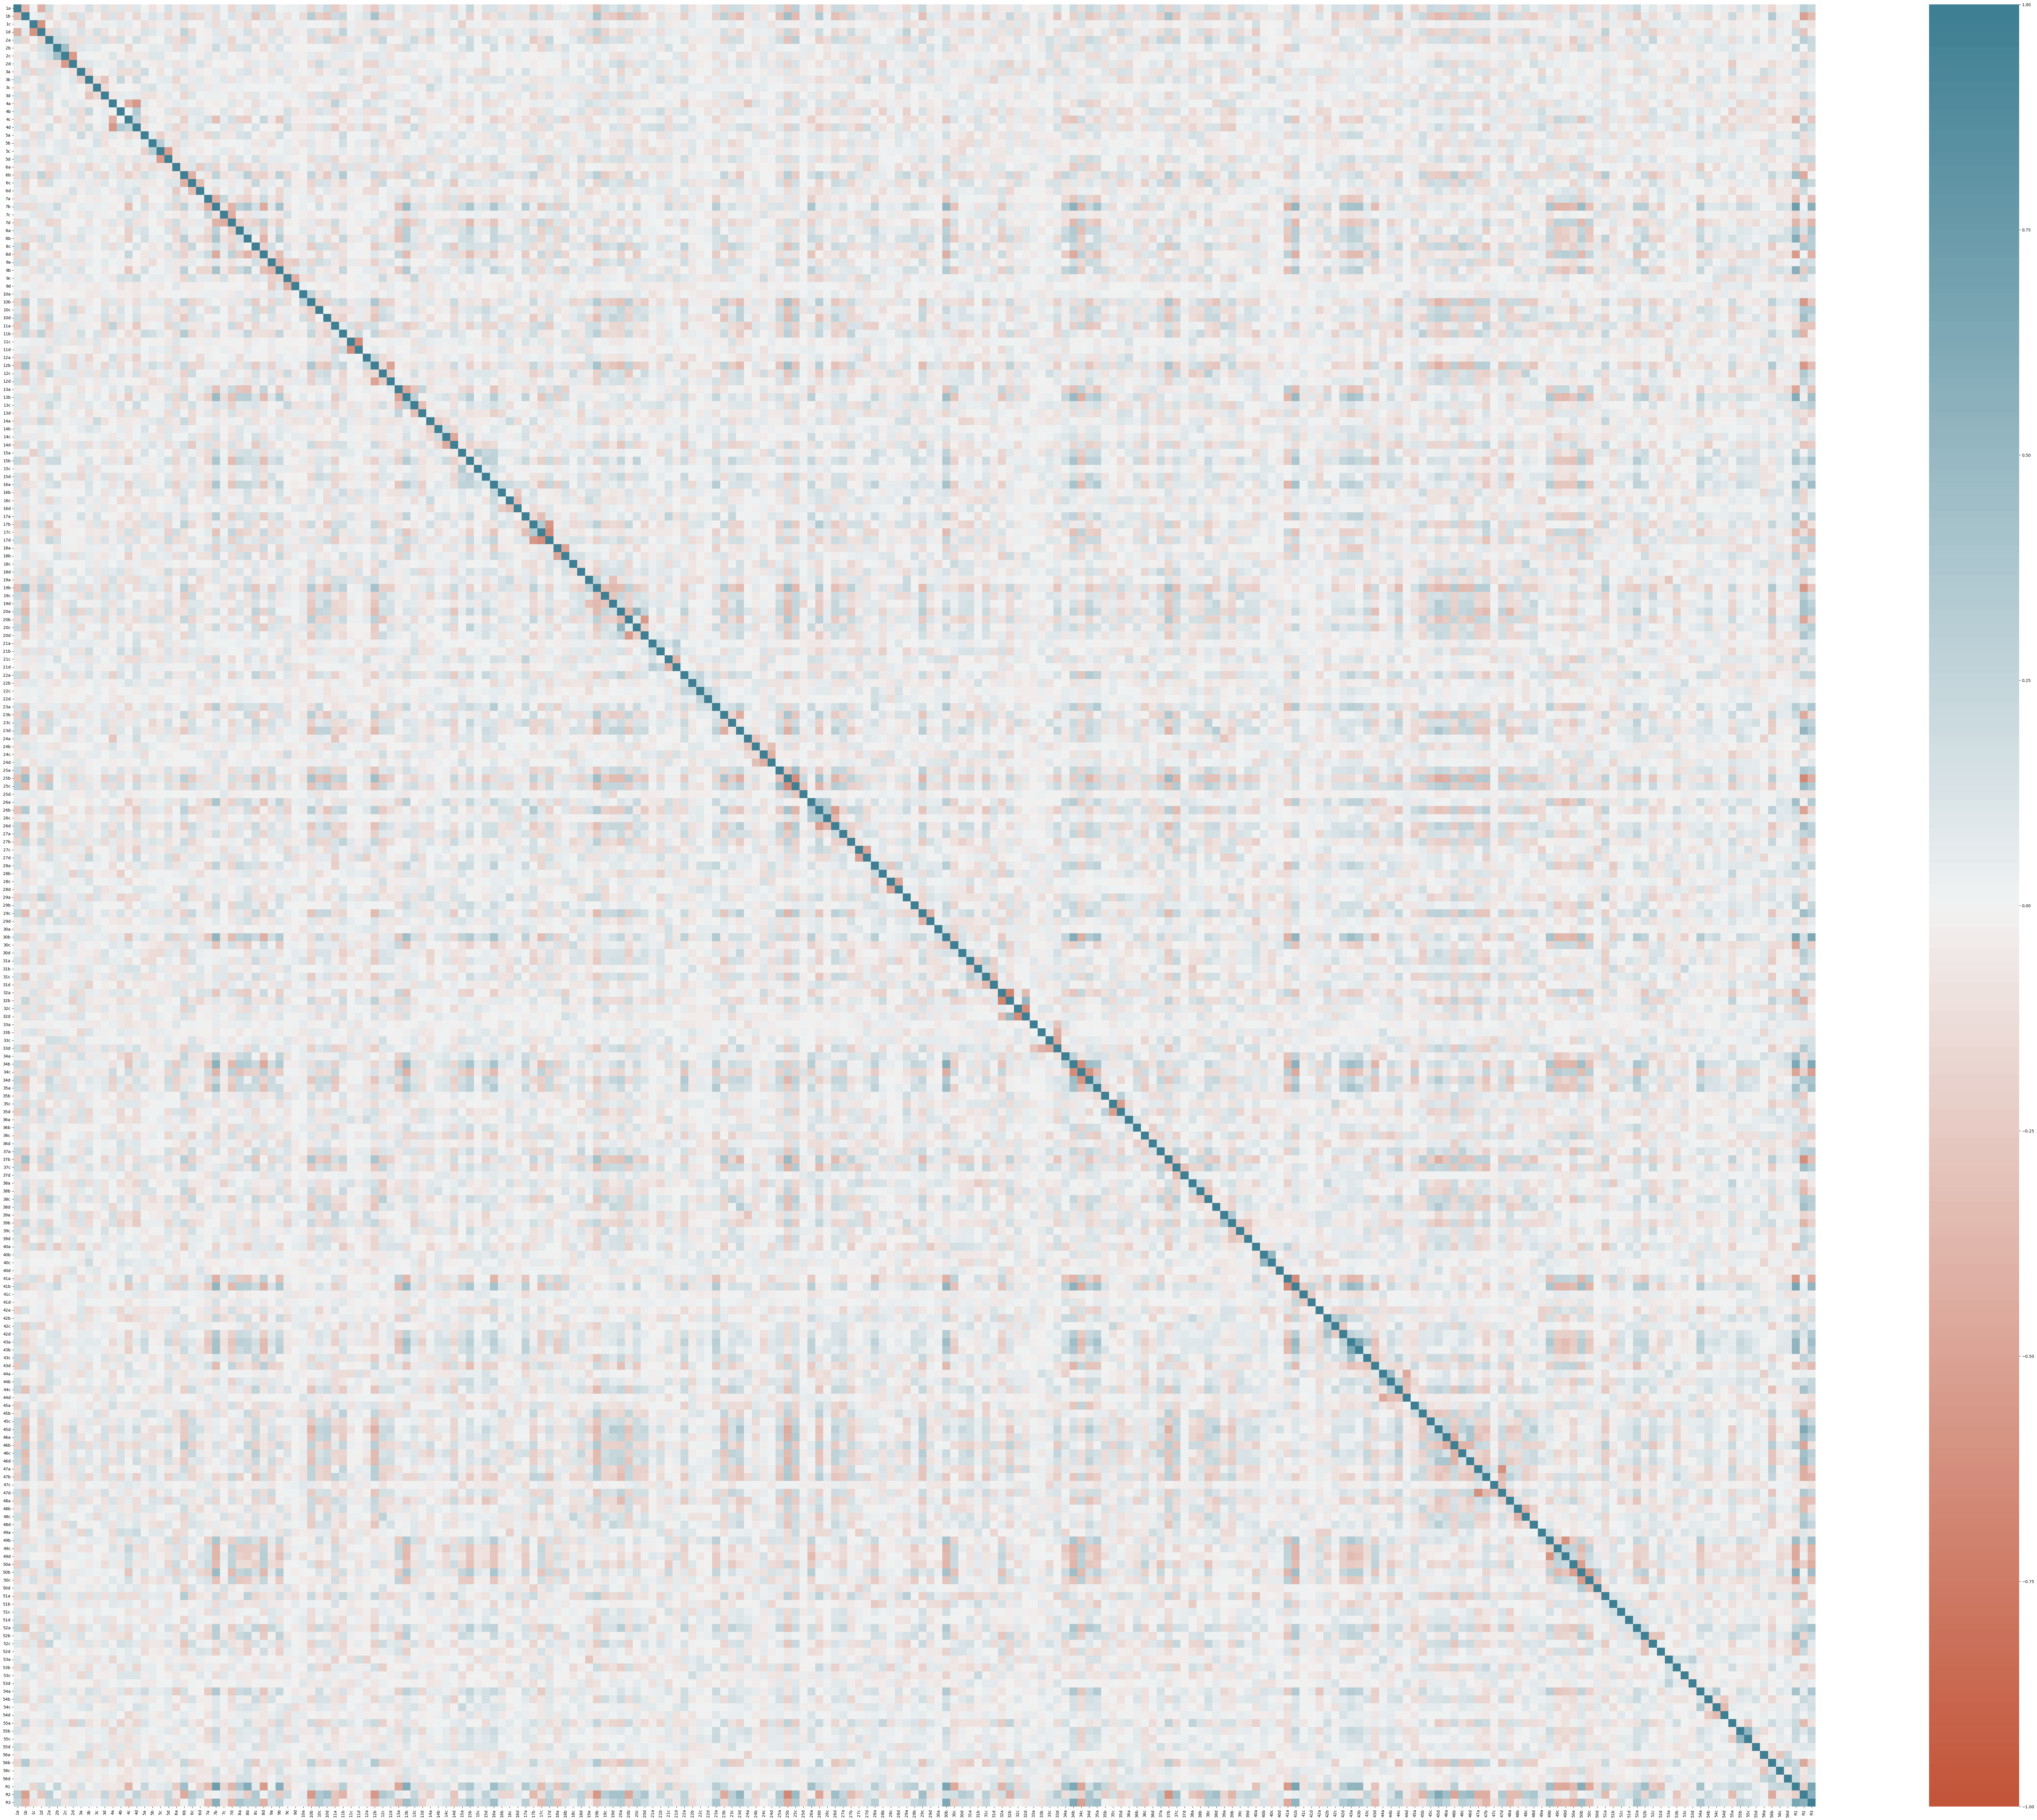

In [ ]:
corr = df_train.corr()

plt.figure(figsize=(100, 80))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True,
    annot = False,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    verticalalignment='center'
)
plt.show()

## X/y Test

In [31]:
df_test_out = df_test.copy()
# df_test_out = renombrar_columnas(df_test_out)
df_test_out = eliminar_registros_duplicados(df_test_out)
df_test_out, _ = escalar_datos(df_test_out, train_scaler_dict)

In [32]:
df_test_out

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,55d,56a,56b,56c,56d,R1,R2,R3,U1,U2
26513,0.000000,0.4,0.526316,1.000000,0.0,0.666667,0.315789,1.000000,1.000000,0.7,...,0.000000,0.666667,1.000000,1.000000,1.000000,0.086234,0.017007,0.015805,0.986383,0.979444
33307,0.500000,0.5,0.947368,0.000000,0.4,0.444444,0.947368,0.000000,0.000000,0.5,...,0.000000,0.500000,0.444444,0.947368,0.000000,0.477816,0.222060,0.490222,0.547908,0.473432
13019,0.000000,1.0,0.947368,0.000000,0.6,0.888889,0.000000,0.315789,0.942857,1.0,...,1.000000,0.000000,0.888889,1.000000,0.000000,0.721729,0.186589,0.562014,0.302798,0.309632
19010,0.500000,0.5,0.947368,0.000000,0.6,0.888889,0.000000,0.315789,1.000000,0.7,...,0.000000,0.666667,1.000000,1.000000,1.000000,0.082594,0.014577,0.015805,0.986383,0.982159
8977,0.666667,0.2,0.315789,0.315789,0.0,0.444444,0.526316,1.000000,0.000000,0.6,...,1.000000,0.000000,0.555556,0.315789,0.315789,0.140159,0.355199,0.372623,0.656598,0.686619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29561,0.166667,0.1,1.000000,0.000000,0.0,0.666667,0.315789,1.000000,1.000000,0.7,...,0.315789,0.666667,1.000000,1.000000,1.000000,0.067122,0.073372,0.077150,0.929686,0.945701
5294,0.000000,0.9,0.105263,1.000000,0.2,0.888889,1.000000,0.000000,1.000000,0.1,...,0.000000,0.666667,1.000000,1.000000,1.000000,0.858703,0.095724,0.642111,0.153751,0.217324
827,1.000000,0.0,0.105263,0.315789,1.0,0.555556,0.105263,1.000000,0.942857,1.0,...,1.000000,0.000000,0.555556,0.000000,0.315789,0.436177,0.816812,0.874632,0.192622,0.153329
23226,0.833333,0.9,0.105263,0.000000,0.0,0.666667,0.315789,1.000000,0.057143,0.6,...,0.000000,0.000000,0.555556,0.315789,0.315789,0.536746,0.330418,0.523172,0.504085,0.395217


In [33]:
X_test, y_test = separar_Xy(df_test_out, columnas_target=columnas_target)
# X_test, y_test = separar_Xy(df_test_out, cant_var_target)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24660, 227), (24660, 2), (6166, 227), (6166, 2))

# MLP Regressor

### MLP Model

In [35]:
# Crear y entrenar el MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50, 10 ), activation='relu', solver='adam', max_iter=300)
mlp_model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = mlp_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

Error Cuadrático Medio: 0.0007391369033495219


In [40]:
# Guardar el modelo
with open('mlp_model_u1u2.pkl', 'wb') as file:
    pickle.dump(mlp_model, file)

In [ ]:
# MSE: 0.003485   R1, R2, R3
# MSE: 0.000739   U1, U2

In [36]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
# for i, columna in enumerate(['R1', 'R2', 'R3']):
for i, columna in enumerate(['U1', 'U2']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,56b,56c,56d,R1,R2,R3,U1,U2,P_U1,P_U2
26513,70,1,65,25,250,7,45,25,350,7,...,15,110,25,3.92,1.30,4.24,95.76,96.846667,94.889212,96.229207
33307,100,3,105,6,270,3,105,6,0,3,...,5,105,6,21.13,5.52,21.95,78.05,83.800000,76.610030,83.259484
13019,70,13,105,6,280,11,15,12,330,13,...,13,110,6,31.85,4.79,24.63,68.15,79.576667,66.173052,78.155933
19010,100,3,105,6,280,11,15,12,350,7,...,15,110,25,3.76,1.25,4.24,95.76,96.916667,95.253319,96.401491
8977,110,-3,45,12,250,3,65,25,0,5,...,7,45,12,6.29,8.26,17.56,82.44,89.296667,81.261496,88.137811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29561,80,-5,110,6,250,7,45,25,350,7,...,15,110,25,3.08,2.46,6.53,93.47,95.976667,92.411057,95.302598
5294,70,11,25,25,260,11,110,6,350,-5,...,15,110,25,37.87,2.92,27.62,62.13,77.196667,60.877258,76.499300
827,130,-7,25,12,300,5,25,25,330,13,...,7,15,12,19.30,17.76,36.30,63.70,75.546667,62.073498,74.518909
23226,120,11,25,6,250,7,45,25,20,5,...,7,45,12,23.72,7.75,23.18,76.28,81.783333,74.738573,81.882652


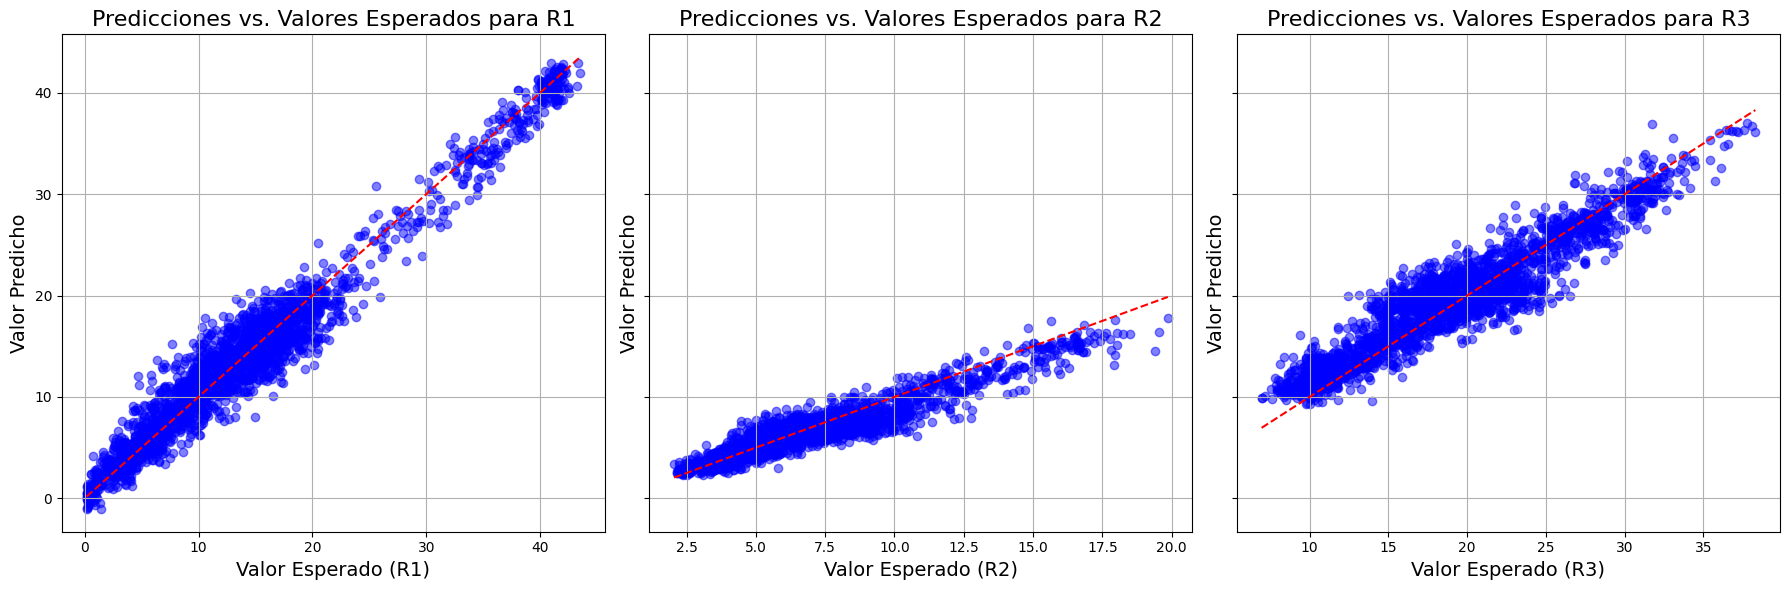

In [ ]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

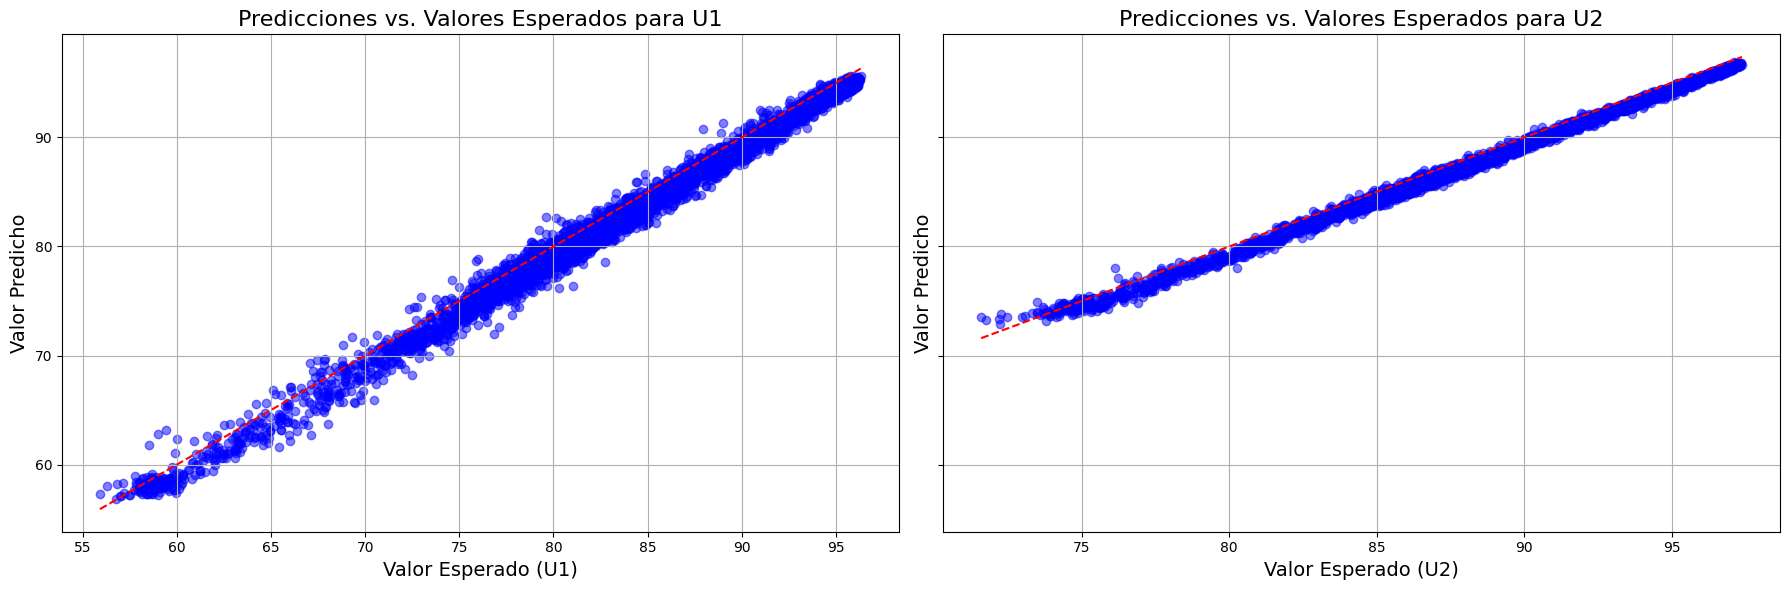

In [38]:
# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['U1', 'U2']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# NN Densa

### Métricas

In [ ]:
def r2_ajustado(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    r2_aj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return r2_aj

In [ ]:
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train
y_test_1 = np.array(y_test.iloc[:, 0])[:, np.newaxis]
y_pred_1 = np.array(y_pred[:, 0])[:, np.newaxis]
y_test_2 = np.array(y_test.iloc[:, 1])[:, np.newaxis]
y_pred_2 = np.array(y_pred[:, 1])[:, np.newaxis]
y_test_3 = np.array(y_test.iloc[:, 2])[:, np.newaxis]
y_pred_3 = np.array(y_pred[:, 2])[:, np.newaxis]

In [ ]:
n, p

(2565, 224)

In [ ]:
y_test_1.shape, y_pred_1.shape, y_test_2.shape, y_pred_2.shape, y_test_3.shape, y_pred_3.shape

((2565, 1), (2565, 1), (2565, 1), (2565, 1), (2565, 1), (2565, 1))

### DNN Model

-------------------------
Fin del Entrenamiento
81/81 [==============================] - 0s 2ms/step
-------------------------
Métricas
Métricas para 281
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.04
R2 Score: 0.96
R2 Ajustado: 0.96

Métricas para 282
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R2 Score: 0.87
R2 Ajustado: 0.86

Métricas para 283
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R2 Score: 0.89
R2 Ajustado: 0.88

-------------------------
Curva de Aprendizaje


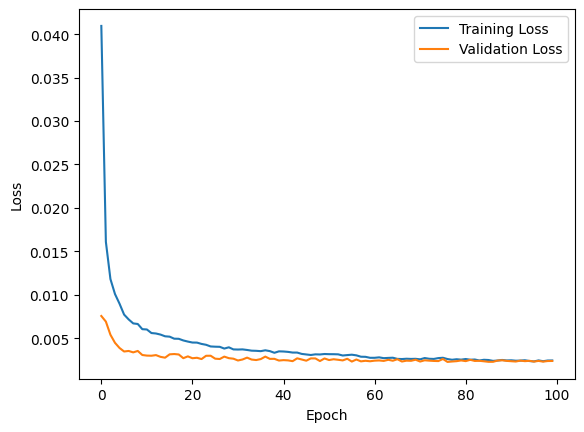

-------------------------
Predicciones


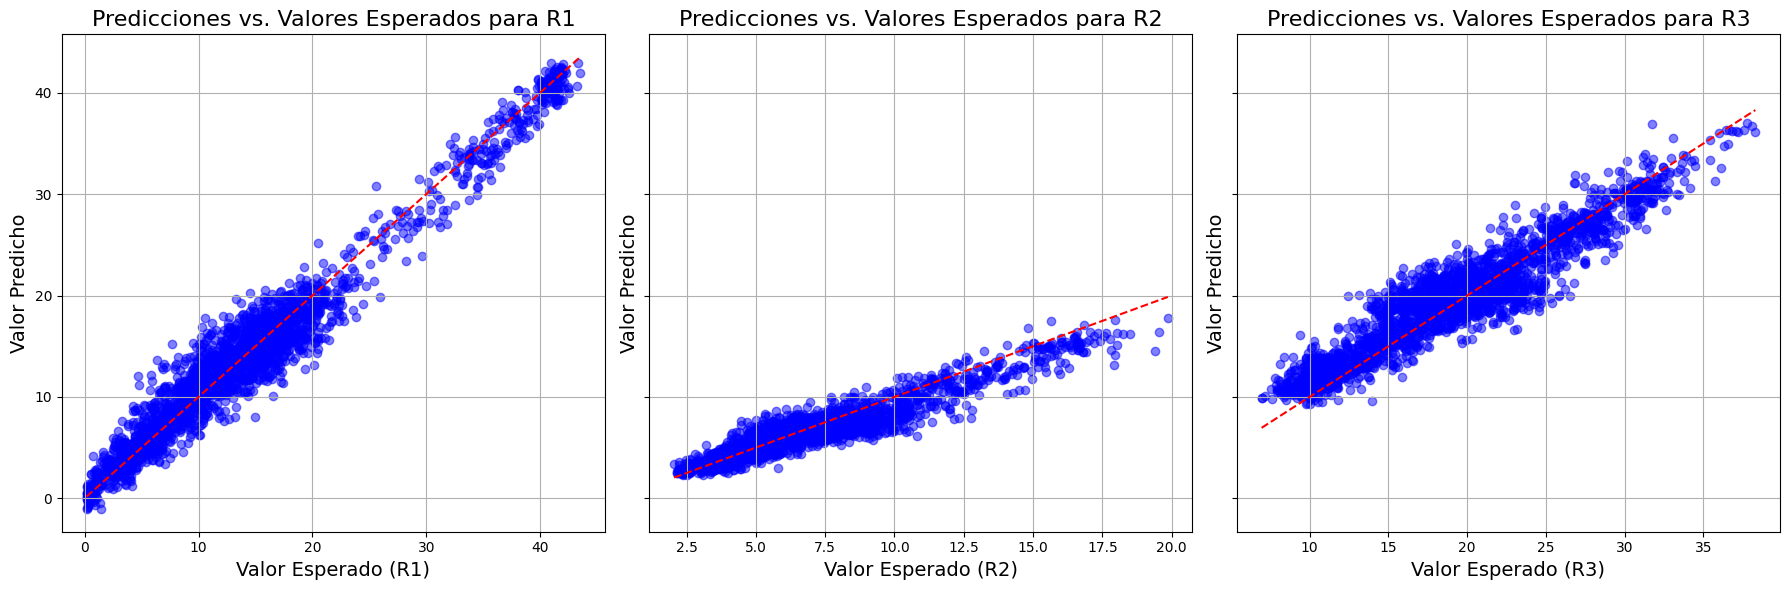

In [ ]:
# Arquitectura
dnn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

dnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

history = dnn_model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = dnn_model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0]  # número total de observaciones en y_test (para cada variable de salida)
p = X_train.shape[1] # número de características en X_train

for i in range(y_test.shape[1]):
    y_test_i = np.array(y_test.iloc[:, i])[:, np.newaxis]  # Obtener las observaciones para la variable de salida i
    y_pred_i = np.array(y_pred[:, i])[:, np.newaxis]  # Obtener las predicciones para la variable de salida i

    r2_aj = r2_ajustado(y_test_i, y_pred_i, n, p)

    # Métricas de regresión para la variable de salida i
    mse = mean_squared_error(y_test_i, y_pred_i)
    mae = mean_absolute_error(y_test_i, y_pred_i)
    r2 = r2_score(y_test_i, y_pred_i)

    print(f"Métricas para {i + 281}")
    print("Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Mean Absolute Error (MAE): {:.2f}".format(mae))
    print("R2 Score: {:.2f}".format(r2))
    print("R2 Ajustado: {:.2f}\n".format(r2_aj))



print("-------------------------\nCurva de Aprendizaje")
# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### #2

-------------------------
Fin del Entrenamiento
77/77 [==============================] - 0s 4ms/step
-------------------------
Métricas
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R2 Score: 0.90
R2 Ajustado: 0.90



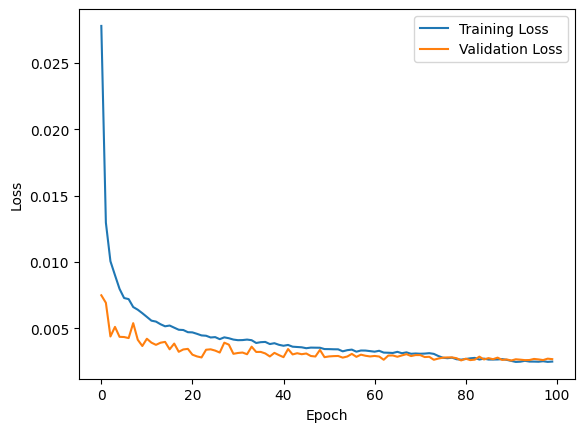

-------------------------
Predicciones


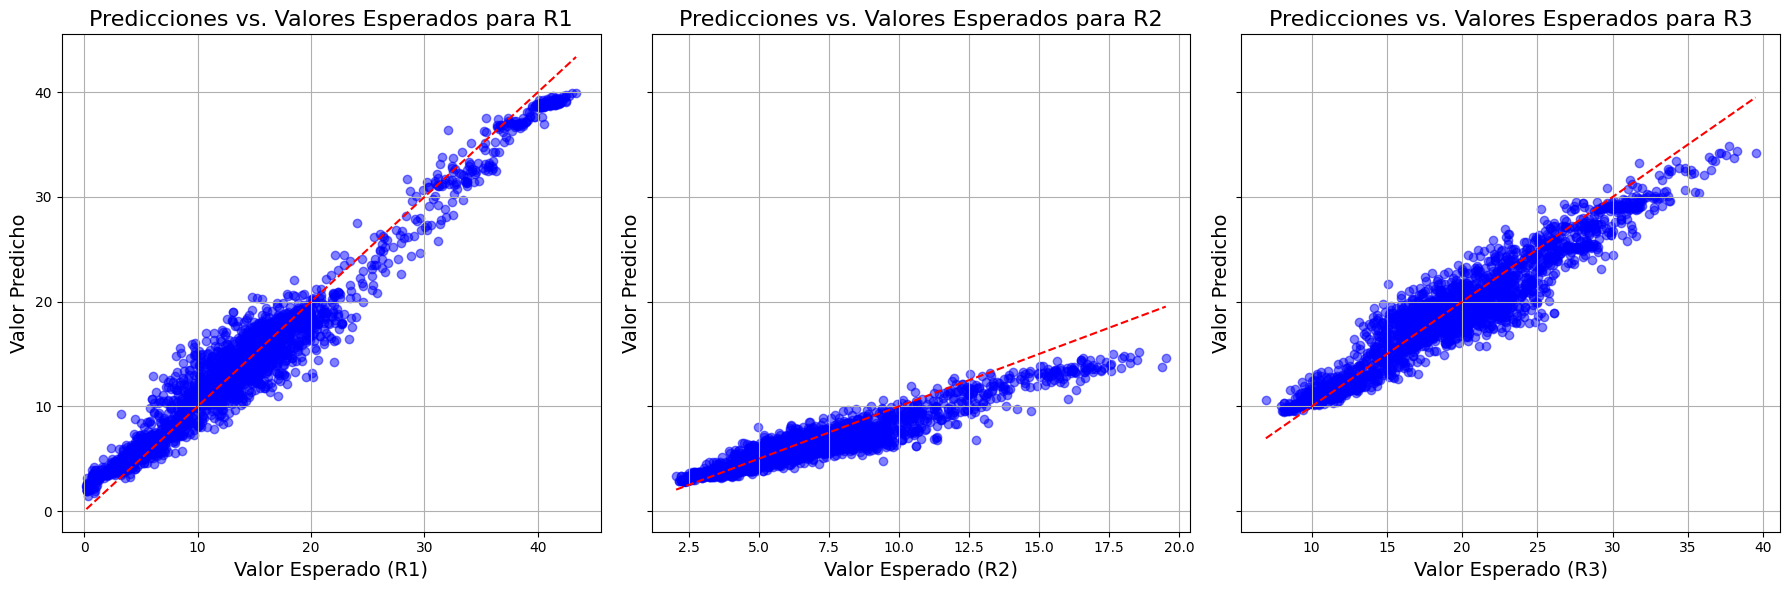

In [ ]:
# Arquitectura
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(512, activation='relu'), Dropout(0.2),
    Dense(256, activation='relu'), Dropout(0.2),
    Dense(128, activation='relu'), Dropout(0.2),
    Dense(64, activation='relu'), Dropout(0.2),
    Dense(32, activation='relu'), Dropout(0.2),
    Dense(3, activation='linear')
])


# Entrenamiento
print("Inicio del Entrenamiento\n-------------------------")

# CallBacks
early_stopping = EarlyStopping(
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    patience=20,
    verbose=0,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

checkpoint_loss = ModelCheckpoint(
    "model-e{epoch:02d}-loss{val_loss:.3f}",
    save_best_only=True,
    monitor="val_loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

reduce_lr = ReduceLROnPlateau(
    monitor="loss",  # Cambiar a la métrica deseada, como "val_mean_squared_error"
    factor=0.5,
    patience=10,
    verbose=1,
    min_delta=1e-4,
    mode="min",  # Cambiar a "min" si estás monitoreando la pérdida
)

callbacks=[reduce_lr]

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=callbacks, validation_split=0.2, verbose=1)

clear_output(wait=True)
print("-------------------------\nFin del Entrenamiento")


# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# Métricas
print("-------------------------\nMétricas")
# Calcular R2 ajustado
n = y_test.shape[0] * y_test.shape[1]  # número total de observaciones en y_test
p = X_train.shape[1] # número de características en X_train
r2_aj = r2_ajustado(y_test, y_pred, n, p)

# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))
print("R2 Ajustado: {:.2f}\n".format(r2_aj))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


print("-------------------------\nPredicciones")
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# RandomForest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,56a,56b,56c,56d,R1,R2,R3,P_R1,P_R2,P_R3
2628,70,11,25,25,260,11,110,6,350,-5,...,90,13,25,12,4.13,3.50,10.08,4.165829,3.405033,10.470147
8573,70,13,105,6,260,11,110,6,0,5,...,30,7,15,12,5.46,5.67,13.09,6.494345,5.309368,13.801446
4285,80,-5,110,6,280,11,15,12,0,13,...,70,15,110,25,20.47,8.57,24.36,16.029598,9.457856,23.301544
4094,120,11,25,6,270,1,15,25,0,5,...,40,5,110,25,19.07,11.24,25.96,20.659795,8.860691,24.486990
6550,130,11,105,6,280,-5,25,6,30,13,...,30,9,105,6,6.76,8.47,17.71,15.020529,7.354527,20.026459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11732,70,-1,25,25,280,-5,45,25,340,-1,...,30,-3,105,6,13.46,5.92,17.95,15.106558,6.679496,19.380186
12595,70,5,110,6,270,1,15,25,30,-7,...,90,-3,65,12,16.69,7.10,20.25,17.136142,6.881618,20.426200
13431,90,5,45,12,260,-5,45,6,330,-5,...,30,13,110,6,14.80,8.15,20.76,13.713711,8.173695,20.505928
4530,130,3,110,6,270,3,105,6,350,7,...,70,5,15,25,11.98,10.71,21.51,10.680188,8.960280,20.338757


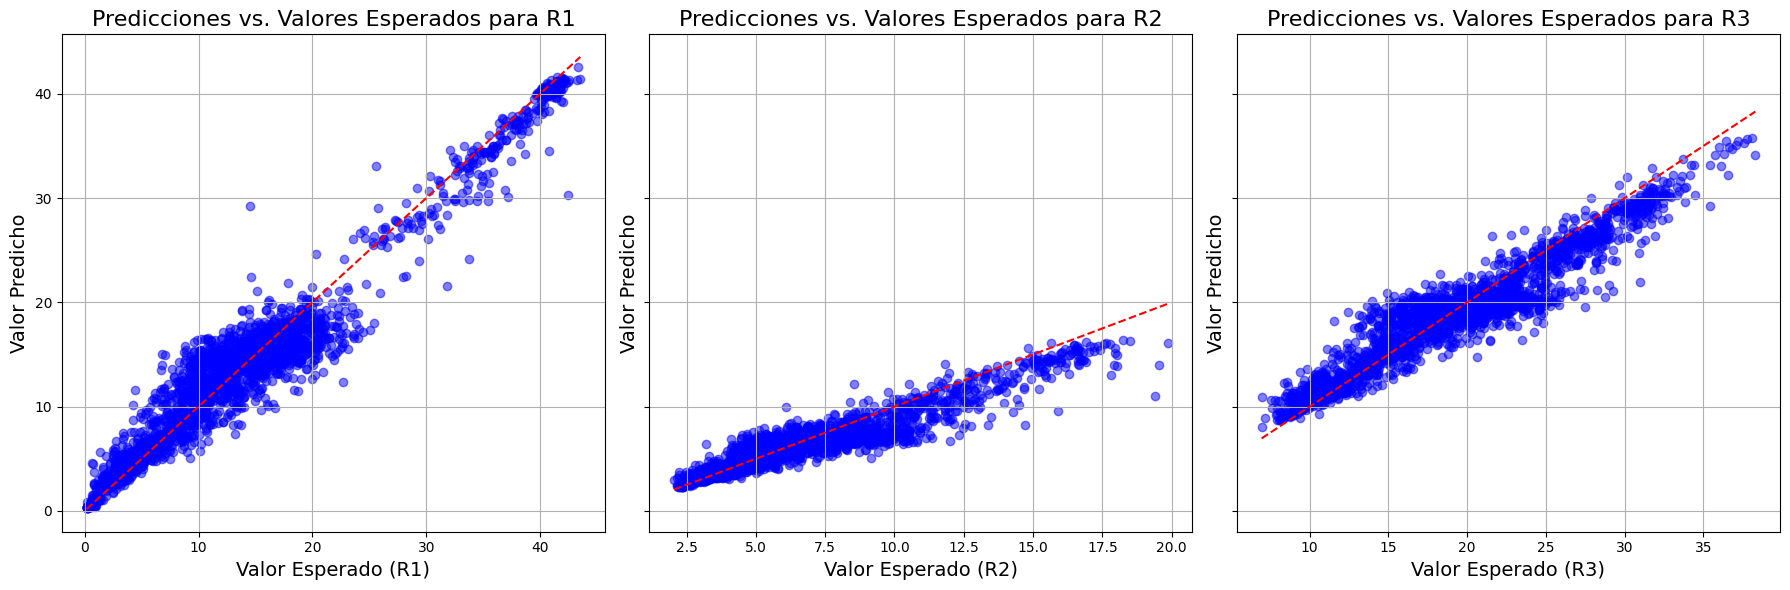

In [ ]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Gradient Boosting

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=123)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,56a,56b,56c,56d,R1,R2,R3,P_R1,P_R2,P_R3
2628,70,11,25,25,260,11,110,6,350,-5,...,90,13,25,12,4.13,3.50,10.08,4.197206,3.391723,10.375802
8573,70,13,105,6,260,11,110,6,0,5,...,30,7,15,12,5.46,5.67,13.09,4.966768,5.542339,12.404055
4285,80,-5,110,6,280,11,15,12,0,13,...,70,15,110,25,20.47,8.57,24.36,20.585245,8.266202,24.171141
4094,120,11,25,6,270,1,15,25,0,5,...,40,5,110,25,19.07,11.24,25.96,19.934259,9.890749,23.560516
6550,130,11,105,6,280,-5,25,6,30,13,...,30,9,105,6,6.76,8.47,17.71,12.111083,7.691729,18.457693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11732,70,-1,25,25,280,-5,45,25,340,-1,...,30,-3,105,6,13.46,5.92,17.95,13.765929,6.124537,18.788759
12595,70,5,110,6,270,1,15,25,30,-7,...,90,-3,65,12,16.69,7.10,20.25,17.177725,6.567895,20.433964
13431,90,5,45,12,260,-5,45,6,330,-5,...,30,13,110,6,14.80,8.15,20.76,14.398714,7.952991,19.316780
4530,130,3,110,6,270,3,105,6,350,7,...,70,5,15,25,11.98,10.71,21.51,10.038937,9.272245,20.360989


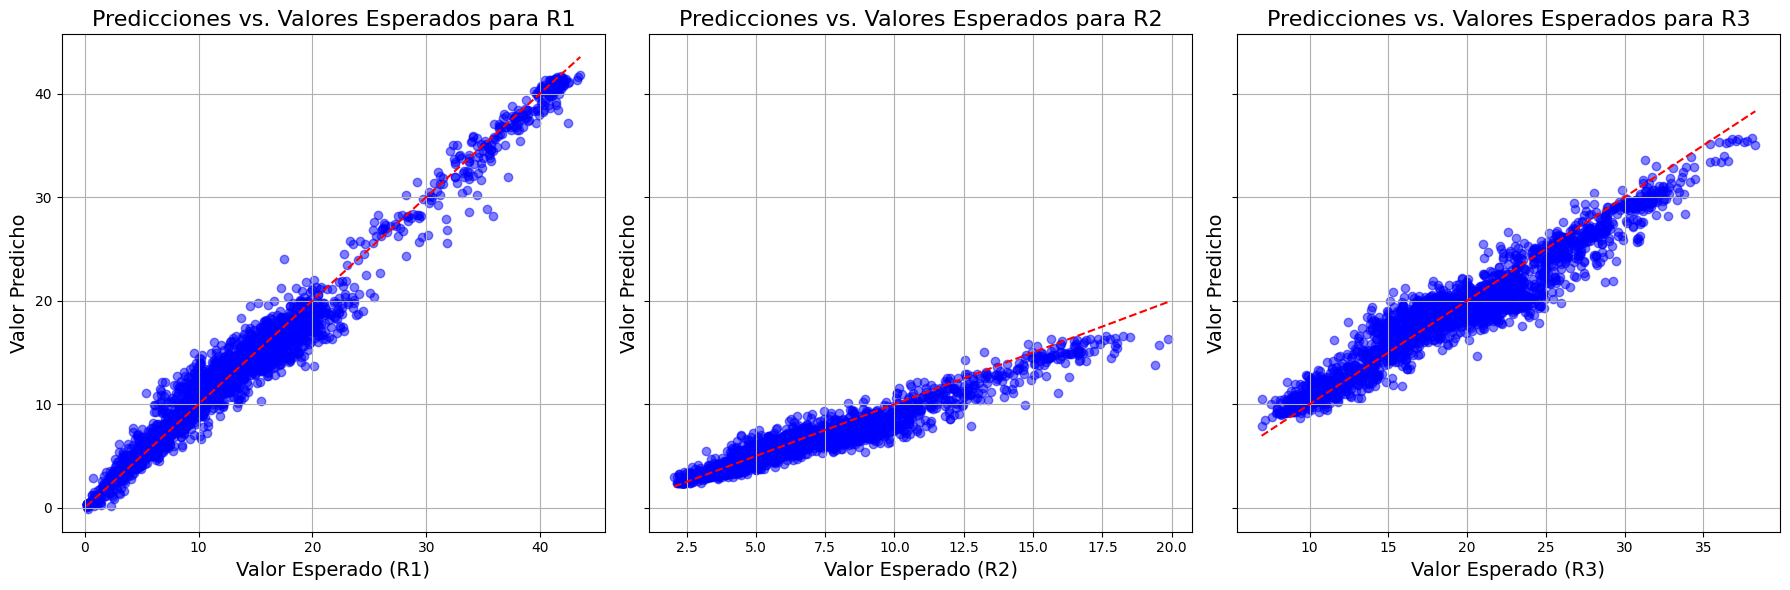

In [ ]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Support Vector Machine

In [ ]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
# svr_model.fit(X_train, y_train)
# y_pred = svr_model.predict(X_test)

# Entrenar un SVR para cada variable objetivo por separado
svr_train_preds = np.column_stack([svr_model.fit(X_train, y_train[:, i]).predict(X_train) for i in range(y_train.shape[1])])
svr_test_preds = np.column_stack([svr_model.fit(X_train, y_train[:, i]).predict(X_test) for i in range(y_train.shape[1])])

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(y_pred[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

In [ ]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# META MODEL

### Predicciones Modelos Base

In [ ]:
# Obtener predicciones del conjunto de entrenamiento
mlp_train_preds = mlp_model.predict(X_train)
rf_train_preds = rf_model.predict(X_train)
xgb_train_preds = xgb_model.predict(X_train)
dnn_train_preds = dnn_model.predict(X_train)

# Concatenar todas las predicciones para formar un nuevo conjunto de características para el meta-modelo
meta_X_train = np.concatenate((mlp_train_preds, rf_train_preds, xgb_train_preds, dnn_train_preds), axis=1)

# Obtener predicciones del conjunto de prueba
mlp_test_preds = mlp_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)
xgb_test_preds = xgb_model.predict(X_test)
dnn_test_preds = dnn_model.predict(X_test)

# Concatenar todas las predicciones para formar un nuevo conjunto de características para el meta-modelo
meta_X_test = np.concatenate((mlp_test_preds, rf_test_preds, xgb_test_preds, dnn_test_preds), axis=1)

81/81 [==============================] - 0s 4ms/step


## RandomForest

### Entrenamiento

In [ ]:
# Entrenar el meta-modelo
meta_model = RandomForestRegressor(n_estimators=500, random_state=42)
meta_model.fit(meta_X_train, y_train)

# Evaluar el meta-modelo en el conjunto de prueba
meta_predictions = meta_model.predict(meta_X_test)
mse = mean_squared_error(y_test, meta_predictions)
print(f'Mean Squared Error del meta-modelo: {mse}')

Mean Squared Error del meta-modelo: 0.0025131016056695933


In [ ]:
# 100 - 0.002789
# 200 - 0.002780
# 500 - 0.002774 / 0.002513
# 1000 - 0.002775

### Predicciones y Métricas

In [ ]:
# Crear DataFrame con datos originales
predicciones = pd.DataFrame(df_test, columns=df_test.columns)

# Obtener las predicciones inversas escaladas y agregarlas como nuevas columnas
for i, columna in enumerate(['R1', 'R2', 'R3']):
    predicciones[f'P_{columna}'] = train_scaler_dict[columna].inverse_transform(meta_predictions[:, i].reshape(-1, 1))

# Mostrar el DataFrame con las predicciones
predicciones

,1a,1b,1c,1d,2a,2b,2c,2d,3a,3b,...,56a,56b,56c,56d,R1,R2,R3,P_R1,P_R2,P_R3
2628,70,11,25,25,260,11,110,6,350,-5,...,90,13,25,12,4.13,3.50,10.08,4.143769,3.418876,10.470919
8573,70,13,105,6,260,11,110,6,0,5,...,30,7,15,12,5.46,5.67,13.09,5.682847,5.260660,13.929341
4285,80,-5,110,6,280,11,15,12,0,13,...,70,15,110,25,20.47,8.57,24.36,19.647273,8.797238,23.981306
4094,120,11,25,6,270,1,15,25,0,5,...,40,5,110,25,19.07,11.24,25.96,20.414927,9.243731,24.417880
6550,130,11,105,6,280,-5,25,6,30,13,...,30,9,105,6,6.76,8.47,17.71,12.084006,7.656938,19.720260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11732,70,-1,25,25,280,-5,45,25,340,-1,...,30,-3,105,6,13.46,5.92,17.95,14.189102,6.553528,19.506612
12595,70,5,110,6,270,1,15,25,30,-7,...,90,-3,65,12,16.69,7.10,20.25,17.422722,6.927344,20.639481
13431,90,5,45,12,260,-5,45,6,330,-5,...,30,13,110,6,14.80,8.15,20.76,14.171501,8.290642,20.805587
4530,130,3,110,6,270,3,105,6,350,7,...,70,5,15,25,11.98,10.71,21.51,9.713699,9.280768,20.353692


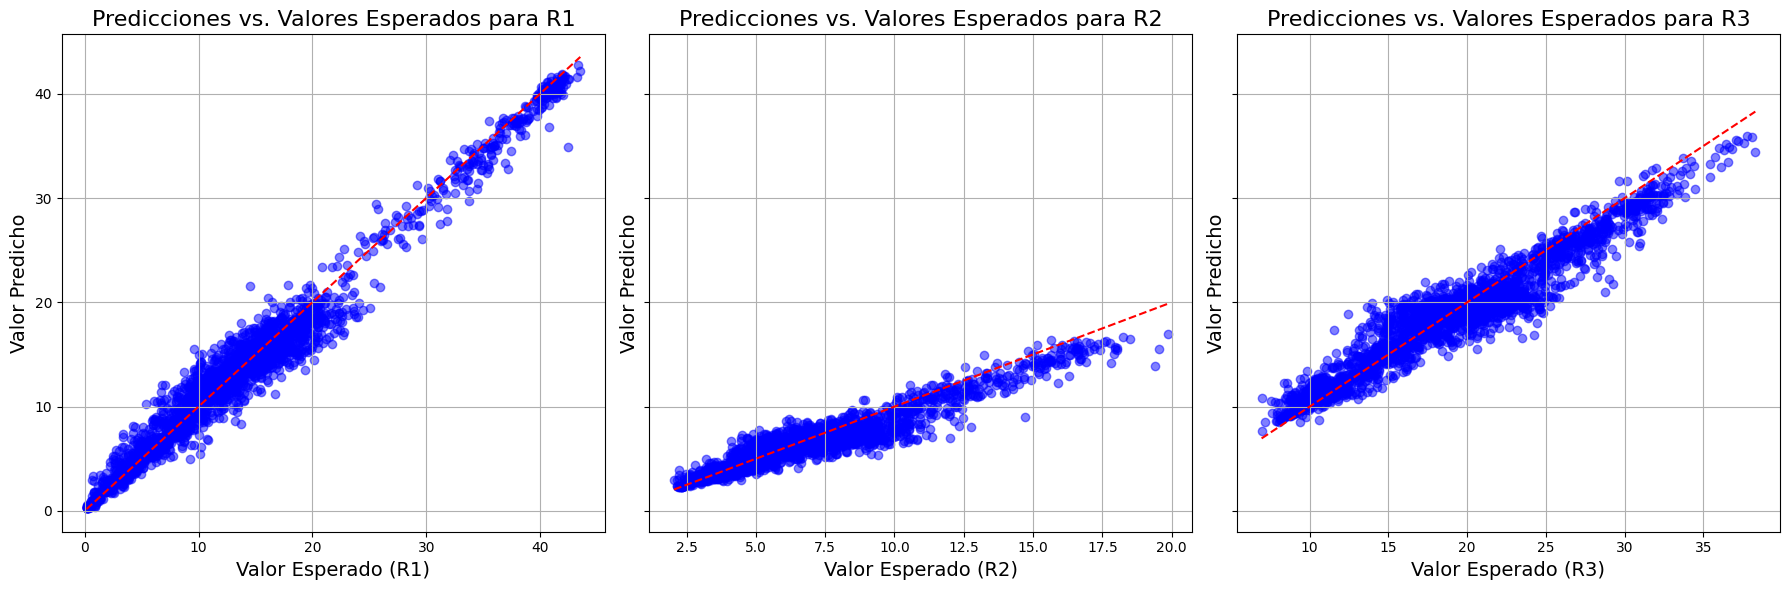

In [ ]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Iterar sobre las columnas de predicción
for i, columna in enumerate(['R1', 'R2', 'R3']):
    # Scatter plot de los valores esperados vs. predichos para la columna actual
    axs[i].scatter(predicciones[columna], predicciones[f'P_{columna}'], color='blue', alpha=0.5)
    # Línea diagonal para referencia
    axs[i].plot([predicciones[columna].min(), predicciones[columna].max()], [predicciones[columna].min(), predicciones[columna].max()], color='red', linestyle='--')
    # Título y etiquetas de los ejes
    axs[i].set_title(f'Predicciones vs. Valores Esperados para {columna}', fontsize=16)
    axs[i].set_xlabel(f'Valor Esperado ({columna})', fontsize=14)
    axs[i].set_ylabel('Valor Predicho', fontsize=14)
    # Cuadrícula
    axs[i].grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Guardado de inputs

In [ ]:
entradas_optimas_rescaled.shape

(1, 224)

In [ ]:
def escribir_en_archivo(entradas):
  # Verificar si el archivo existe
  if not os.path.exists('resultados.txt'):
    # Crear el archivo
    with open('resultados.txt', 'w') as f:
      f.write('')

  # Abrir el archivo en modo append
  with open('resultados.txt', 'a') as f:
    # Escribir las entradas óptimas en el archivo
    np.savetxt(f, entradas, delimiter=',')

In [ ]:
escribir_en_archivo(entradas_optimas_rescaled)

# Import / Export de Modelos

TensorFlow

In [ ]:
model.save('mlp_model')

In [ ]:
loaded_model = tf.keras.models.load_model('mlp_model')

Pickle

In [ ]:
mlp.save('mlp_model.h5')
with open('mlp_model_pickle.pkl', 'wb') as file:
    pickle.dump('mlp_model.h5', file)

In [ ]:
with open('mlp_model_pickle.pkl', 'rb') as file:
    model_file = pickle.load(file)
loaded_model = tf.keras.models.load_model(model_file)

Joblib

In [ ]:
joblib.dump(mlp, 'mlp_regressor_model.pkl')

['mlp_regressor_model.pkl']

In [ ]:
mlp_loaded = joblib.load('mlp_regressor_model.pkl')